
=== Bayesian Decision Theory using Random Forest ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Not Setosa       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



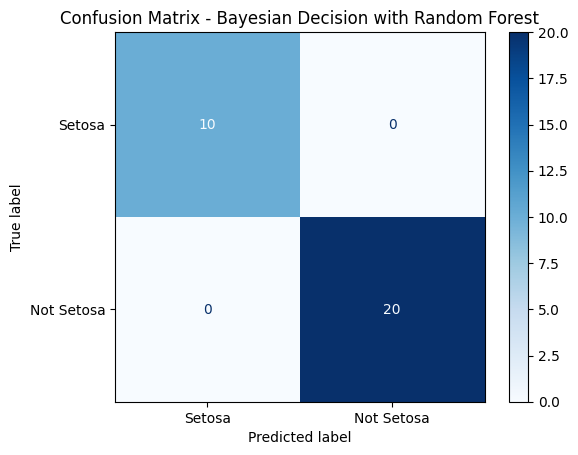

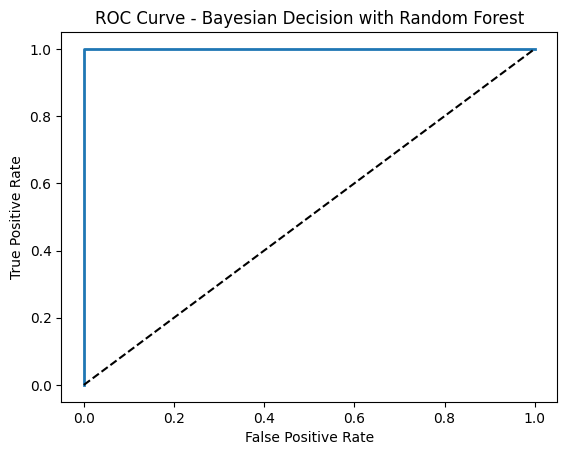

AUC Score: 1.0


In [1]:
# --- Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize

# --- Load Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# --- Binary version for ROC ---
# We'll classify "Setosa (0)" vs "Not Setosa (1)"
y_binary = (y != 0).astype(int)

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# --- Train Random Forest Classifier ---
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

# --- Bayesian Decision Step ---
# Random forest gives P(y=1|x) and P(y=0|x)
y_proba = rf_clf.predict_proba(X_test)

# Decision rule: choose class with highest posterior probability
y_pred = np.argmax(y_proba, axis=1)

# --- Evaluation Metrics ---
print("\n=== Bayesian Decision Theory using Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Setosa", "Not Setosa"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Setosa", "Not Setosa"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Bayesian Decision with Random Forest")
plt.show()

# --- ROC Curve & AUC ---
y_score = y_proba[:, 1]  # Probability of class "Not Setosa"
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bayesian Decision with Random Forest')
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_score))
